# Week 2 - Development

## Learning Objectives

* List different optimization strategies
* List the benefits of coding style guides
* Prepare documentation for a sample project
* Illustrate testing approaches
* Apply version control software to organize a sample project

In [1]:
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

print("Numpy:", np.__version__)

random.seed(0)

Numpy: 1.10.1


## Travelling salesman problem

Last week we covered several different exercises including a solver for a simplified version of the [travelling salesman problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem). Instead of finding a cycle we only find the optimal path, there is no requirement to return to the starting point.

This problem has numerous applications and we may want to use our solution again in other projects. Let's take a look at our solution and then decide how we can make it more useful.

In [35]:
coords = [(0,0), (10,5), (10,10), (5,10), (3,3), (3,7), (12,3), (10,11)]

for a, b, in zip(coords[:-1], coords[1:]):
    print(a, b)
    
def distance(coords):
    distance = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance


print(distance(coords))

all_options = []
for option in itertools.permutations(coords, len(coords)):
    all_options.append((option, distance(option)))
all_options.sort(key=lambda x: x[1]) # sort by smallest to largest distance

print('Shortest route:', all_options[0])
print('Number of routes considered:', len(all_options))

(0, 0) (10, 5)
(10, 5) (10, 10)
(10, 10) (5, 10)
(5, 10) (3, 3)
(3, 3) (3, 7)
(3, 7) (12, 3)
(12, 3) (10, 11)
50.55551882981089
Shortest route: (((12, 3), (10, 5), (10, 10), (10, 11), (5, 10), (3, 7), (3, 3), (0, 0)), 25.775638600922246)
Number of routes considered: 40320


Currently, the only way to reuse this code would be to copy and paste it. Our first improvement would be to convert it into a function.

In [3]:
def distance(coords):
    distance = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance

def find_best_route(coords):
    best_distance = distance(coords)
    best = coords
    for option in itertools.permutations(coords, len(coords)):
        option_distance = distance(option)
        if option_distance < best_distance:
            best = option
            best_distance = option_distance
    return (best_distance, best)

[(864, 394), (776, 911), (430, 41), (265, 988), (523, 497), (414, 940), (802, 849), (310, 991)]


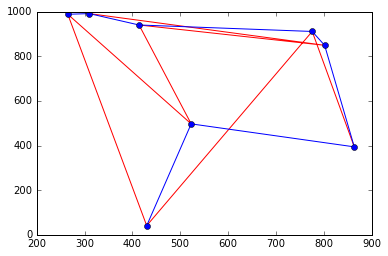

In [67]:
coords = [(random.randint(0,1000), random.randint(0,1000)) for i in range(8)]
print(coords)
x = np.array([x[0] for x in coords])
y = np.array([y[1] for y in coords])
plt.plot(x, y, 'r-')

best_distance, best_coords = find_best_route(coords)

best_x = np.array([x[0] for x in best_coords])
best_y = np.array([y[1] for y in best_coords])

plt.plot(best_x, best_y, 'bo-')
plt.show()

These functions are now much easier to reuse in this notebook. The next step is to move them out into their own file.

In [4]:
!cat tsp_solver.py

import itertools

def distance(coords):
    distance = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance

def find_best_route(coords):
    best_distance = distance(coords)
    best = coords
    for option in itertools.permutations(coords, len(coords)):
        option_distance = distance(option)
        if option_distance < best_distance:
            best = option
            best_distance = option_distance
    return (best_distance, best)


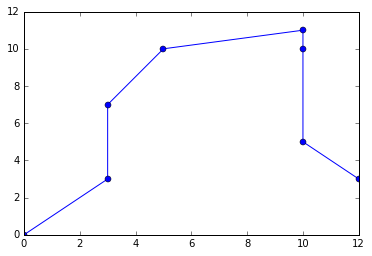

In [5]:
import tsp_solver
best_distance, best_coords = tsp_solver.find_best_route(coords)

best_x = np.array([x[0] for x in best_coords])
best_y = np.array([y[1] for y in best_coords])

plt.plot(best_x, best_y, 'bo-')
plt.show()

These functions can now be imported into any other notebook or file. We might stop here but if this code is really important we can, and should, go further.

* Improve the readability of the code
* Provide documentation
* Actually test that the code is working properly

## Improving Readability

Code is typically read much more often than it is written. Following a simple set of guidelines makes code easier to read. The precise guidelines that are followed is less important than applying them consistently. A consistent writing style makes reading code much easier.

Individual projects and companies may have their own style guides (such as [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html) and [Twisted](http://twistedmatrix.com/documents/current/core/development/policy/coding-standard.html#auto26)) with [PEP8](https://www.python.org/dev/peps/pep-0008/) being the style guide used for python itself and the most widely used style guide in the community.

To help with adhering to the guide there are a number of software tools that can automatically check our code. [flake8](https://pypi.python.org/pypi/flake8) is one example that checks against the style guide as well as catching some other issues.

In [7]:
!flake8 tsp_solver.py

tsp_solver.py:3:1: E302 expected 2 blank lines, found 1
tsp_solver.py:9:1: E302 expected 2 blank lines, found 1


The style guide suggests leaving two blank lines before each function definition so that it stands out more. This is a simple fix.

In [8]:
!flake8 tsp_solver_pep8.py

## Documentation

At the moment the only way to understand how to use our code is to read it all. There is no indication of how the input variables should be structured or what the function returns. If we wanted to reuse this code in the future we would waste a significant amount of time simply re-familiarizing ourselves with what is happening.

Documentation, both included with the code and separate if necessary, can significantly speed up this process.

In python files we can include documentation at the top of files and with individual functions.

https://www.python.org/dev/peps/pep-0257/

In [9]:
!cat tsp_solver_doc.py

"""Module to find the shortest path connecting a set of points
    
    find_best_route accepts a set of coordinates and will return the shortest
    route."""
import itertools


def distance(coords):
    """Calculates the distance of a path between multiple points
    
    Arguments:
    coords -- List of coordinates, e.g. [(0,0), (1,1)]
    
    Returns: Total distance as a float
    """
    distance = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance


def find_best_route(coords):
    """Find the shortest path between a set of points
    
    Arguments:
    coords -- List of coordinates, e.g. [(0,0), (1,1)]
    
    Returns: Tuple of shortest distance and the route
    """
    best_distance = distance(coords)
    best = coords
    for option in itertools.permutations(coords, len(coords)):
        option_distance = distance(option)
        if option_distance < best_distance:
            best 

In [10]:
import tsp_solver_doc

In [11]:
tsp_solver_doc.find_best_route?

## Testing

So far we have been assuming that the code we wrote works correctly. The solutions we have been getting look reasonable but have been too complex for us to be sure.

We can test our code on a set of points for which we know the solution. For example, points on a straight line

In [12]:
print(tsp_solver.find_best_route([(0,0), (0,30), (0,20)]))

(30.0, ((0, 0), (0, 20), (0, 30)))


This gives the correct result but is just one test. For greater confidence we may want to test a number of different potential issues. Packages exist for writing and running suites of tests but for the moment we will use a simple function.

In [13]:
def test_find_best_route(func):
    # The straight line test
    assert func([(0,0), (0,30), (0,20)])[0] == 30
    # Test a triangle
    assert func([(0,0), (0,30), (20,30)])[0] == 50
    # Test a square
    assert func([(0,0), (0,5), (5,5), (5,0)])[0] == 15
    # Test negative numbers
    assert func([(0,0), (0,-5), (0,5)])[0] == 10
    print('All tests pass')
    
test_find_best_route(tsp_solver.find_best_route)

All tests pass


## Version control

We have now moved our solver out to its own file, corrected a styling issue, and added documentation. For each change a new file was created and if we continue like this we will lose track of which is the most current version. This is a contrived example but is a real issue. Each time we try a new approach to a problem it is tempting to create a new file in case the original proves superior.

For a small project this might be just about bearable. As a project grows and requires multiple different files it becomes nearly impossible to manually keep track of the dependencies. This is a very old problem, and there are a number of highly developed software tools to keep track of different file versions.

Instead of creating new files whenever any change is tried, the current version is committed to the version control software and changes can then be made directly. If the change is an improvement it can also be committed to the version control software, if not then the changes can be deleted and the original restored.

The most popular version control software at the moment is [Git](http://www.git-scm.com/).

There are a number of good tutorials available:

* http://betterexplained.com/articles/a-visual-guide-to-version-control/
* https://www.gitbook.com/book/gitbookio/progit
* http://gitbyexample.org/

##Improvements and Extensions

Now that our code is tracked by version control we can consider making changes. Although we only had 8 points the code was actually quite slow. Sadly, this is quite a challenging problem and the execution time rapidly becomes prohibitive as the number of points increases.

In [14]:
coords = [(random.randint(0,1000), random.randint(0,1000)) for i in range(10)]
print(coords)

[(864, 394), (776, 911), (430, 41), (265, 988), (523, 497), (414, 940), (802, 849), (310, 991), (488, 366), (597, 913)]


In [15]:
timings3 = %timeit -o -r 1 find_best_route(coords[:3])
timings4 = %timeit -o -r 1 find_best_route(coords[:4])
timings5 = %timeit -o -r 1 find_best_route(coords[:5])
timings6 = %timeit -o -r 1 find_best_route(coords[:6])
timings7 = %timeit -o -r 1 find_best_route(coords[:7])
timings8 = %timeit -o -r 1 find_best_route(coords[:8])
timings9 = %timeit -o -r 1 find_best_route(coords[:9])
timings10 = %timeit -o -r 1 find_best_route(coords[:10])

timings = [t.best for t in [timings3, timings4, timings5, timings6, timings7, timings8, timings9, timings10]]

10000 loops, best of 1: 34 µs per loop
10000 loops, best of 1: 163 µs per loop
1000 loops, best of 1: 993 µs per loop
100 loops, best of 1: 8.2 ms per loop
10 loops, best of 1: 58.8 ms per loop
1 loops, best of 1: 537 ms per loop
1 loops, best of 1: 5.41 s per loop
1 loops, best of 1: 1min per loop


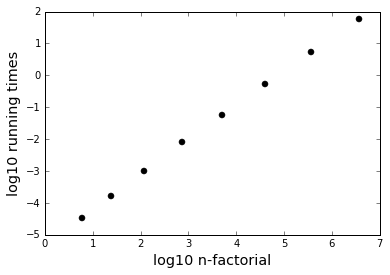

In [16]:
perms = [math.factorial(i) for i in range(3, 11)]

fig, ax = plt.subplots(1,1)
ax.plot(np.log10(perms), np.log10(timings), 'ko')
ax.set_xlabel('log10 n-factorial', size='x-large')
ax.set_ylabel('log10 running times', size='x-large')
plt.show()

Better algorithms have been developed to solve this problem in less time but for very large numbers of points even these algorithms become prohibitive.

A significant improvement in speed is possible if instead of looking for the __perfect__ solution, we instead content ourselves with a __good__ solution.

This is an __optimization problem__, in which we are attempting to choose a set of parameters (the order of the points) that minimizes a cost function, the distance travelled. This is a very common task in machine learning: 

* optimizing a model to best describe the available data
* dividing a dataset into clusters to minimize the variance between points in each cluster
* etc

Before looking at the travelling salesman problem, let's look at a simpler problem

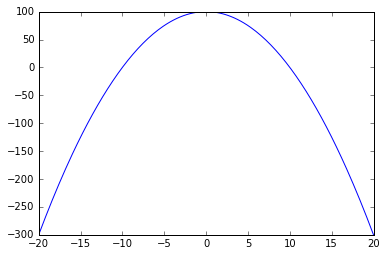

In [17]:
def output_function(x):
    return 100 - x ** 2

inputs = np.linspace(-20, 20, 200)
plt.plot(inputs, output_function(inputs), 'b-')
plt.show()

One simple approach to optimization is __gradient descent__. This problem is an ideal candidate for gradient descent because there is only one maximum. From any starting point we can calculate the gradient and follow it up to the maximum.

We will look at gradient descent in greater detail in future classes as it works very well for many machine learning tasks. Unfortunately for the travelling salesman problem it is likely to perform poorly.

50.55551882981089
Number of routes considered: 40320


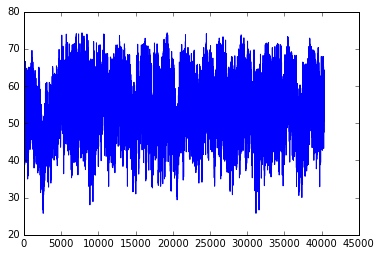

In [18]:
coords = [(0,0), (10,5), (10,10), (5,10), (3,3), (3,7), (12,3), (10,11)]


def distance(coords):
    distance = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance


print(distance(coords))

all_options = []
for option in itertools.permutations(coords, len(coords)):
    all_options.append((option, distance(option)))
#all_options.sort(key=lambda x: x[1])


print('Number of routes considered:', len(all_options))

plt.plot([i[1] for i in all_options])
plt.show()

Unlike the simple example above plotting the distance of each of the possible paths reveals significant variation. Starting at a random point and following the gradient would only get us to the local minimum, the likelihood of this also being the global minimum is very small.

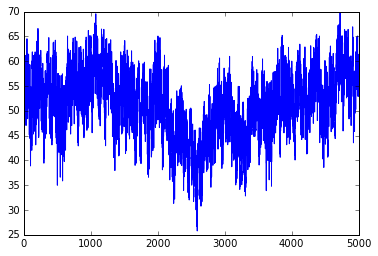

In [19]:
plt.plot([i[1] for i in all_options[:5000]])
plt.show()

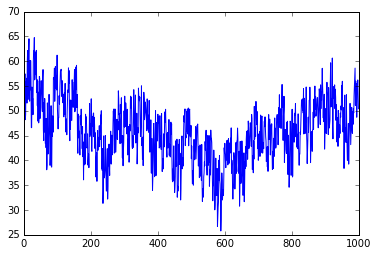

In [20]:
plt.plot([i[1] for i in all_options[2000:3000]])
plt.show()

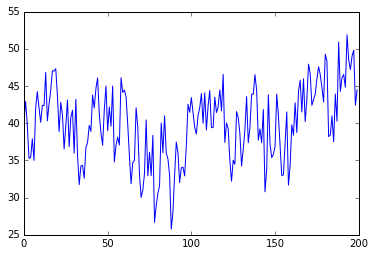

In [21]:
plt.plot([i[1] for i in all_options[2500:2700]])
plt.show()

To find the global minimum our approach will need to explore further than just the local minimum.

We will discuss two different algorithms:

* [Simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing)
* [Genetic algorithm](https://en.wikipedia.org/wiki/Genetic_algorithm)

There are a number of packages available for both simulated annealing ([SimulatedAnnealing](https://github.com/skylergrammer/SimulatedAnnealing), [simanneal](https://github.com/perrygeo/simanneal)) and genetic algorithm ([pyevolve](http://pyevolve.sourceforge.net/), [DEAP](http://deap.readthedocs.org/en/master/)) but both are simple enough that we can implement them ourselves.

Both approaches require:

* A cost function - that we already have
* A path altering function

In [23]:
def new_path(existing_path):
    path = existing_path[:]
    point = random.randint(0, len(path)-2)
    path[point+1], path[point] = path[point], path[point+1]
    return path

print(coords)
print(new_path(coords))

[(0, 0), (10, 5), (10, 10), (5, 10), (3, 3), (3, 7), (12, 3), (10, 11)]
[(0, 0), (10, 5), (10, 10), (5, 10), (3, 7), (3, 3), (12, 3), (10, 11)]


## Simulated Annealing

With both our functions made we can now implement the first of these two algorithms.

3448.5327323214324


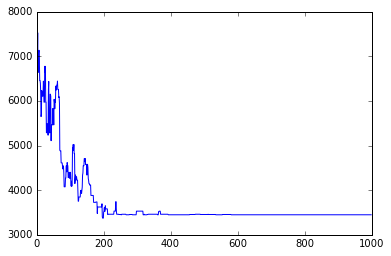

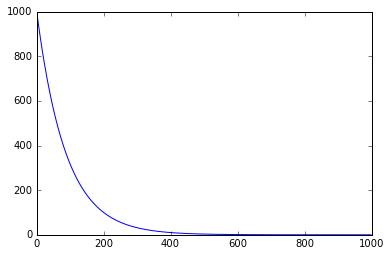

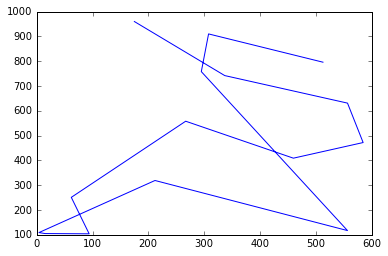

In [27]:
# generate a large and random walk to traverse the search space with randomness
# in order to avoid staying in local minimums
# with temp_factor
def simulated_annealing_optimizer(starting_path, cost_func, new_path_func, start_temp, min_temp, steps):
    current_path = starting_path[:]
    current_cost = cost_func(current_path)
    temp_factor = -np.log(start_temp / min_temp)
    history = []
    for s in range(0, steps):
        temp = start_temp * np.exp(temp_factor * s / steps)
        new_path = new_path_func(current_path)
        new_cost = cost_func(new_path)
        if (new_cost < current_cost) or (random.random() <= np.exp(-(new_cost - current_cost)/temp)):
            current_path = new_path
            current_cost = new_cost
        record = {'step':s, 'temperature':temp, 'current_cost':current_cost, }
        history.append(record)
    return (current_path, current_cost, history)

best_path, best_cost, history = simulated_annealing_optimizer(coords, distance, new_path, 1000, 0.01, 1000)
print(best_cost)
plt.plot([i['current_cost'] for i in history])
plt.show()

plt.plot([i['temperature'] for i in history])
plt.show()

plt.plot([i[0] for i in best_path], [i[1] for i in best_path])
plt.show()

4507.833632577341


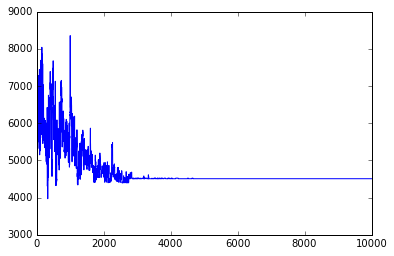

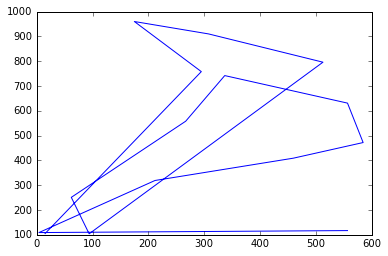

In [26]:
coords = [(random.randint(0,1000), random.randint(0,1000)) for i in range(15)]

best_path, best_cost, history = simulated_annealing_optimizer(coords, distance, new_path, 1000, 0.01, 10000)
print(best_cost)
plt.plot([i['current_cost'] for i in history])
plt.show()

plt.plot([i[0] for i in best_path], [i[1] for i in best_path])

## Genetic Algorithm

Implementing a genetic algorithm is slightly more challenging

2364.5512425143856


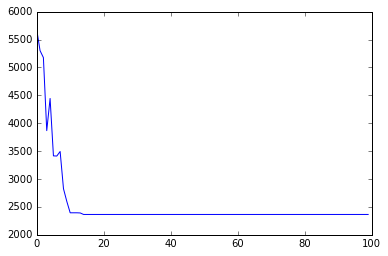

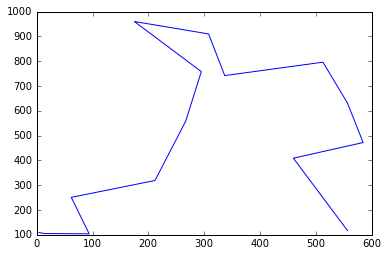

In [32]:
def select_best(population, cost_func, num_to_keep):
    scored_population = [(i, cost_func(i)) for i in population]
    scored_population.sort(key=lambda x: x[1])
    return [i[0] for i in scored_population[:num_to_keep]]

def recombine(population):
    # Randomly choose two parents
    options = list(range(len(population)))
    random.shuffle(options)
    partner1 = options[0]
    partner2 = options[1]
    # Choose a split point, take the first parents order to that split point, 
    # then the second parents order for all remaining points
    split_point = random.randint(0, len(population[0])-1)
    child = population[partner1][:split_point]
    for point in population[partner2]:
        if point not in child:
            child.append(point)
    return child


def genetic_algorithm_optimizer(starting_path, cost_func, new_path_func, pop_size, generations):
    # Create a starting population by randomly shuffling the points
    population = []
    for i in range(pop_size):
        new_path = starting_path[:]
        random.shuffle(new_path)
        population.append(new_path)
    history = []
    # Take the top 25% of routes and recombine to create new routes, repeating for generations
    for i in range(generations):
        pop_best = select_best(population, cost_func, int(pop_size / 4))
        new_population = []
        for i in range(pop_size):
            new_population.append(recombine(pop_best))
        population = new_population
        record = {'generation':i, 'current_cost':cost_func(population[0]),}
        history.append(record)
    return (population[0], cost_func(population[0]), history)


best_path, best_cost, history = genetic_algorithm_optimizer(coords, distance, new_path, 500, 100)
print(best_cost)
plt.plot([i['current_cost'] for i in history])
plt.show()        
    
plt.plot([i[0] for i in best_path], [i[1] for i in best_path])
plt.show()

# Exercises

* Copy the simulated annealing and genetic algorithm functions out into their own files.
* Add documentation to both the files and the functions.
* Our genetic algorithm function currently only uses recombination. As we saw from the simulated annealing approach mutation is also a powerful tool in locating the optimal solution. Add mutation to the genetic algorithm function using the new_path function we created.
* Our simulated annealing function generated a reasonable solution but there were signs that the approach was limited by our function for creating new paths. Create a new function to generate paths in a different way. Does this improve the performance of the simulated annealing function?

In [37]:
!ls -l

total 286
drwxr-xr-x 1 wayne 197121      0 Feb 11 18:05 __pycache__
-rw-r--r-- 1 wayne 197121    536 Feb 10 08:41 tsp_solver.py
-rw-r--r-- 1 wayne 197121   1086 Feb 10 08:41 tsp_solver_doc.py
-rw-r--r-- 1 wayne 197121    538 Feb 10 08:41 tsp_solver_pep8.py
drwxr-xr-x 1 wayne 197121      0 Feb 11 11:45 Wk02
-rw-r--r-- 1 wayne 197121 281678 Feb 11 19:07 Wk02-Development_wl.ipynb
